In [89]:
import torch

In [107]:
import numpy as np
from  matplotlib import pyplot as plt
import librosa
from ipywidgets import interact, fixed, FloatSlider
%matplotlib inline

In [108]:
# Fs = 16000
# duration = 10
# omega1 = 1
# omega2 = 5
# N_dur = int(duration * Fs)
# t = np.arange(N_dur) / Fs
# t1 = t[:N//2]
# t2 = t[N//2:]

# x1 = 1.0 * np.sin(2 * np.pi * omega1 * t1)
# x2 = 0.7 * np.sin(2 * np.pi * omega2 * t2)
# x = np.concatenate((x1, x2))

# def pad_and_plot(t, x, Fs, pad_len_sec, pad_mode):
    
#     pad_len = int(pad_len_sec * Fs)
    
#     t = np.concatenate((np.arange(-pad_len, 0) / Fs, t, 
#                         np.arange(len(x), len(x) + pad_len) / Fs))
#     x = np.pad(x, pad_len, pad_mode)
#     N = len(x)
        
#     plt.figure(figsize=(8, 1.5))
#     ax1 = plt.subplot(1, 2, 1)
#     plt.plot(t, x, c='k')
#     #plt.xlim([t[0], t[-1]])
#     plt.xlim([-1.0, 11.0])
#     plt.xlabel('Time (seconds)')
#     plt.ylabel('Amplitude')

#     ax2 = plt.subplot(1, 2, 2)
#     X = np.abs(np.fft.fft(x)) / Fs
#     freq = np.fft.fftfreq(N, d=1/Fs)
#     X = X[:N//2]
#     freq = freq[:N//2]
#     plt.plot(freq, X, c='k')
#     plt.xlim([0, 7])
#     plt.ylim([0, 3])
#     plt.xlabel('Frequency (Hz)')
#     plt.ylabel('Magnitude')
#     plt.tight_layout()
#     plt.show()
    
#     return ax1, ax2, x
    
# print('No padding:')
# ax1, ax2, padded_x = pad_and_plot(t, x, Fs, 0.0, 'constant')

# print('Zero padding:')
# ax1, ax2, padded_x = pad_and_plot(t, x, Fs, 1.0, 'constant')

# print('Reflect padding:');
# ax1, ax2, padded_x = pad_and_plot(t, x, Fs, 1.0, 'reflect')


### Edge

In [110]:
def compute_stft(x, Fs, N, H, pad_mode='constant', center=True, color='gray_r'):    
    X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, 
                     window='hann', pad_mode=pad_mode, center=center)
    Y = np.abs(X) ** 2
    Y = Y / np.max(Y)
    return Y

def plot_stft(Y, Fs, N, H, time_offset=0, time_unit='frames', xlim=None, ylim=None, title='', xlabel='', color='hot'):
    time_samples =  np.arange(Y.shape[1])
    if time_unit == 'sec':
        time_sec = np.arange(Y.shape[1]) * (H / Fs) + time_offset
        extent=[time_sec[0]-H/(2*Fs), time_sec[-1]+H/(2*Fs), 0, Fs/2]
        xlabel='Time (seconds)'
    else:
        time_samples = np.arange(Y.shape[1])
        extent=[time_samples[0]-1/2, time_samples[-1]+1/2, 0, Fs/2]                     
        xlabel='Time (frames)'    
    plt.imshow(Y, cmap=color, aspect='auto', origin='lower', extent=extent)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency (Hz)')
    plt.title(title)
    plt.colorbar()

In [111]:
x = np.random.random_sample(9870)
Fs = 16000

# N = 512
# H = 128
N = 1024
H = 160


In [112]:
xlim_frame = [-2, 22]
xlim_sec = [-1, 11]
ylim_hz = [0, 8]

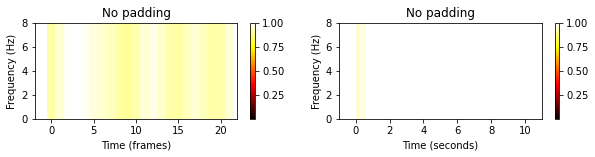

In [113]:
plt.figure(figsize=(10, 6))

# No padding
Y = compute_stft(x, Fs, N, H, pad_mode=None, center=False)
plt.subplot(3, 2, 1)
plot_stft(Y, Fs, N, H, xlim=xlim_frame, ylim=ylim_hz, title='No padding')

plt.subplot(3, 2, 2)
plot_stft(Y, Fs, N, H, time_offset=N / (2 * Fs), time_unit='sec', xlim=xlim_sec, ylim=ylim_hz, title='No padding')


In [114]:
x.shape

(9870,)

In [115]:
9870//160

61

In [120]:
Y.shape

(513, 56)

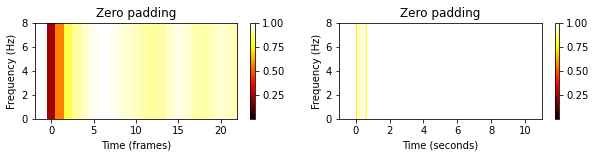

In [121]:
plt.figure(figsize=(10, 6))

# Zero padding
Y = compute_stft(x, Fs, N, H, pad_mode='constant', center=True)
plt.subplot(3, 2, 3)
plot_stft(Y, Fs, N, H, xlim=xlim_frame, ylim=ylim_hz, title='Zero padding')

plt.subplot(3, 2, 4)
plot_stft(Y, Fs, N, H, time_unit='sec', xlim=xlim_sec, ylim=ylim_hz, title='Zero padding')



In [122]:
x.shape

(9870,)

In [123]:
N, H

(1024, 160)

In [124]:
Y.shape

(513, 62)

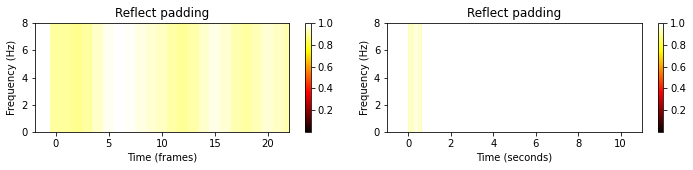

In [125]:
plt.figure(figsize=(10, 6))

# Reflect padding
Y = compute_stft(x, Fs, N, H, pad_mode='reflect', center=True)
plt.subplot(3, 2, 5)
plot_stft(Y, Fs, N, H, xlim=xlim_frame, ylim=ylim_hz, title='Reflect padding')

plt.subplot(3, 2, 6)
time_sec = np.arange(Y.shape[1]) * (H / Fs) 
plot_stft(Y, Fs, N, H, time_unit='sec', xlim=xlim_sec, ylim=ylim_hz, title='Reflect padding')

plt.tight_layout()


In [126]:
x.shape

(9870,)

In [131]:
9870//160

61

In [129]:
Y.shape

(513, 62)

###

In [2]:
import numpy as np

In [31]:
from scipy.special import softmax

In [3]:
x = np.array([0.5, 0.35, 0.20])


In [4]:
V = np.array([[0.1490, 0.9857, 0.5839], [0.4866, 0.1684, 0.6936]])

In [8]:
np.dot(x, V.T)

array([0.536275, 0.44096 ])

In [27]:
1/(1+np.exp(-0.536275)), 1/(1+np.exp(-0.44096))

(0.6309454631254338, 0.6084877557408354)

In [25]:
h = np.array([0.6309, 0.6084])
W = np.array([[0.58311, 0.1284, 0.5721], [0.9248, 0.2693, 0.7825]])

In [26]:
np.dot(h, W)

array([0.93053242, 0.24484968, 0.83701089])

In [32]:
softmax([0.93053242, 0.24484968, 0.83701089])

array([0.4141705 , 0.20863681, 0.3771927 ])